In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import sklearn.svm
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as rmse

# Lectura de Datos

In [64]:
train = pd.read_excel("train.xlsx")
val = pd.read_excel("val.xlsx")

# Agrupación de datos

Día

In [65]:
train_dia = train.groupby(['BARRIO','DIA','MES','ANIO']).sum().reset_index()
#data_dia = data_dia.to_frame()
train_dia.to_excel("train_dia.xlsx",index=False)
train_dia.head()

,BARRIO,DIA,MES,ANIO,atropello,caida_ocupante,choque,choque_atropello,incendio,otro,volcamiento
0,aguas frias,1,2,2015,0,0,0,0,0,1,0
1,aguas frias,1,3,2014,0,0,1,0,0,0,0
2,aguas frias,1,9,2014,0,0,1,0,0,0,0
3,aguas frias,1,10,2015,0,0,1,0,0,0,0
4,aguas frias,2,5,2016,0,0,1,0,0,0,0


In [66]:
val_dia = val.groupby(['BARRIO','DIA','MES','ANIO']).sum().reset_index()
#data_dia = data_dia.to_frame()
val_dia.to_excel("val_dia.xlsx",index=False)
val_dia.head()

,BARRIO,DIA,MES,ANIO,atropello,caida_ocupante,choque,choque_atropello,incendio,otro,volcamiento
0,aguas frias,2,5,2018,0,0,1,0,0,0,0
1,aguas frias,2,8,2018,1,0,0,0,0,0,0
2,aguas frias,4,11,2018,0,1,1,0,0,0,0
3,aguas frias,10,8,2018,1,0,0,0,0,0,0
4,aguas frias,19,10,2018,0,0,0,0,0,1,0


Mes

In [67]:
train_mes = train.groupby(['BARRIO','MES','ANIO']).sum().reset_index()
#data_dia = data_dia.to_frame()
train_mes.to_excel("train_mes.xlsx",index=False)
train_mes.head()

,BARRIO,MES,ANIO,DIA,atropello,caida_ocupante,choque,choque_atropello,incendio,otro,volcamiento
0,aguas frias,1,2014,30,0,0,1,0,0,0,0
1,aguas frias,1,2015,13,0,0,0,0,0,1,0
2,aguas frias,1,2016,26,0,0,2,0,0,1,0
3,aguas frias,2,2014,10,0,0,2,0,0,0,0
4,aguas frias,2,2015,28,0,0,1,0,0,1,0


In [68]:
val_mes = val.groupby(['BARRIO','MES','ANIO']).sum().reset_index()
#data_dia = data_dia.to_frame()
val_mes.to_excel("val_mes.xlsx",index=False)
val_mes.head()

,BARRIO,MES,ANIO,DIA,atropello,caida_ocupante,choque,choque_atropello,incendio,otro,volcamiento
0,aguas frias,5,2018,22,0,0,2,0,0,0,0
1,aguas frias,8,2018,12,2,0,0,0,0,0,0
2,aguas frias,10,2018,19,0,0,0,0,0,1,0
3,aguas frias,11,2018,8,0,1,1,0,0,0,0
4,aldea pablo vi,1,2018,24,2,0,0,0,0,0,0


# Predictor Mensual

# Lectura de datos

In [3]:
train = pd.read_excel("train_mes.xlsx")
val = pd.read_excel("val_mes.xlsx")

# LabelEncoder

LabelEnconder para el atributo barrio

In [4]:
le = LabelEncoder()
le.fit(train['BARRIO'].unique())

LabelEncoder()

In [5]:
train['BARRIO_ENCODER']=le.transform(train['BARRIO'])

In [6]:
le = LabelEncoder()
le.fit(val['BARRIO'].unique())

LabelEncoder()

In [7]:
val['BARRIO_ENCODER']=le.transform(val['BARRIO'])

In [8]:
train.head()

,BARRIO,MES,ANIO,DIA,atropello,caida_ocupante,choque,choque_atropello,incendio,otro,volcamiento,BARRIO_ENCODER
0,aguas frias,1,2014,30,0,0,1,0,0,0,0,0
1,aguas frias,1,2015,13,0,0,0,0,0,1,0,0
2,aguas frias,1,2016,26,0,0,2,0,0,1,0,0
3,aguas frias,2,2014,10,0,0,2,0,0,0,0,0
4,aguas frias,2,2015,28,0,0,1,0,0,1,0,0


In [9]:
val.head()

,BARRIO,MES,ANIO,DIA,atropello,caida_ocupante,choque,choque_atropello,incendio,otro,volcamiento,BARRIO_ENCODER
0,aguas frias,5,2018,22,0,0,2,0,0,0,0,0
1,aguas frias,8,2018,12,2,0,0,0,0,0,0,0
2,aguas frias,10,2018,19,0,0,0,0,0,1,0,0
3,aguas frias,11,2018,8,0,1,1,0,0,0,0,0
4,aldea pablo vi,1,2018,24,2,0,0,0,0,0,0,1


# X y y

In [10]:
X_train = train[['BARRIO_ENCODER','MES','ANIO']].values

In [11]:
y_train = train[['atropello','caida_ocupante','choque','choque_atropello','incendio','otro','volcamiento']].values

# Normalización

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)

# Entrenamiento del modelo

# Maquina de Soporte Vectorial

In [49]:
svm =  MultiOutputRegressor(sklearn.svm.SVR(),n_jobs=-1)
scores = cross_val_score(svm, X_train, y_train, cv=5,scoring = 'neg_mean_squared_error')
print('R2 promedio:',np.mean(scores))
svm = svm.fit(X_train,y_train)
joblib.dump(svm, 'models/svm.pkl')

R2 promedio: -21.910033111997084


['models/svm.pkl']

In [50]:
y_pred = svm.predict(X_train)
rmse(y_train, y_pred)

22.39872632947792

# SVM

In [86]:
bosque =  RandomForestRegressor()
scores = cross_val_score(bosque, X_train, y_train, cv=5,scoring = 'r2')
print('R2 promedio:',np.mean(scores))
bosque = bosque.fit(X_train,y_train)
joblib.dump(bosque, 'models/bosque.pkl',compress=9)

R2 promedio: -2.8444194695475953


['models/bosque.pkl']

# Red Neuronal

In [92]:
parametros = {"hidden_layer_sizes":  [(18,),(20,),(25,),(50,),(100,),(18,2),(20,2),(25,2),(18,3),(20,3),(25,3),(18,4),(20,4),(25,4),(50,4),(100,4),(200,4),(18,5),(20,5),(25,5),(50,5),(100,5),(200,5)]}
red = sklearn.neural_network.MLPClassifier()
clf = GridSearchCV(red, parametros,cv=5,scoring='f1',n_jobs = -1)
clf.fit(X_train,y_train)
print("Mejores Parametros Encontrados")
print(clf.best_params_)

AttributeError: module 'sklearn' has no attribute 'neural_network'

# Validacion

In [22]:
X_val = val[['BARRIO_ENCODER','MES','ANIO']].values
y_val = val[['atropello','caida_ocupante','choque','choque_atropello','incendio','otro','volcamiento']].values

In [23]:
X_val = min_max_scaler.transform(X_val)

# Bosque Aleatorio

In [27]:
y_pred = bosque.predict(X_val)
r2_score(y_val, y_pred)

-0.2779509908575746

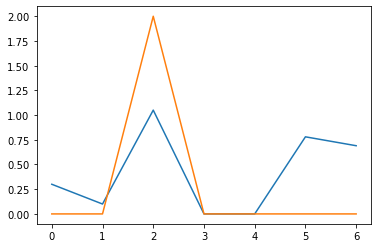

In [36]:
plt.plot([i for i in range(7)],y_pred[0])
plt.plot([i for i in range(7)],y_val[0])

# SVM

In [52]:
y_pred = svm.predict(X_val)
rmse(y_val, y_pred)

22.95022740943588

In [66]:
y_val = pd.DataFrame(y_val)

In [70]:
y_pred = pd.DataFrame(y_pred)

In [80]:
y_val_0 = list(y_val[0])[0:100]

In [81]:
y_pred_0 = list(y_pred[0])[0:100]

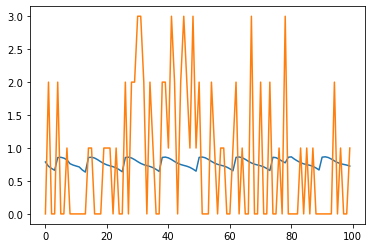

In [85]:
plt.plot([i for i in range(len(y_pred_0))],y_pred_0)
plt.plot([i for i in range(len(y_val_0))],y_val_0)